In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import datetime

import sqlite3

import requests
from bs4 import BeautifulSoup

import os
import sys



In [2]:
moc_os_dict = {"elektrownie": ["węgiel kamienny", 
                               "węgiel brunatny",
                               "gazowe" , "wodne", 
                               "wiatrowe", 
                               "biogaz/biomasa", 
                               "słoneczne", 
                               "inne"],
            "moc 2020": [24289.532, 
                         8456.4,
                         3154.949,
                         2403.5,
                         6347.651,
                         1055.653,
                         3960.042,
                         574.1],
             "moc 2021": [23031.472, 
                          8397.4, 
                          3309.409, 
                          2406.9, 
                          7007.697, 
                          1069.004, 
                          7681.368, 
                          574.1  ], 
              "moc 2022": [22436.344, 
                           8269.4,
                           3845.905,
                           2408.2,
                           8129.465,
                           1120.998,
                           12114.696,
                           574.1 ], 
}

In [3]:
moc_os_dict

{'elektrownie': ['węgiel kamienny',
  'węgiel brunatny',
  'gazowe',
  'wodne',
  'wiatrowe',
  'biogaz/biomasa',
  'słoneczne',
  'inne'],
 'moc 2020': [24289.532,
  8456.4,
  3154.949,
  2403.5,
  6347.651,
  1055.653,
  3960.042,
  574.1],
 'moc 2021': [23031.472,
  8397.4,
  3309.409,
  2406.9,
  7007.697,
  1069.004,
  7681.368,
  574.1],
 'moc 2022': [22436.344,
  8269.4,
  3845.905,
  2408.2,
  8129.465,
  1120.998,
  12114.696,
  574.1]}

In [4]:
df_moc = pd.DataFrame(moc_os_dict)

In [5]:
df_moc = df_moc.sort_values('moc 2021', ascending=False)

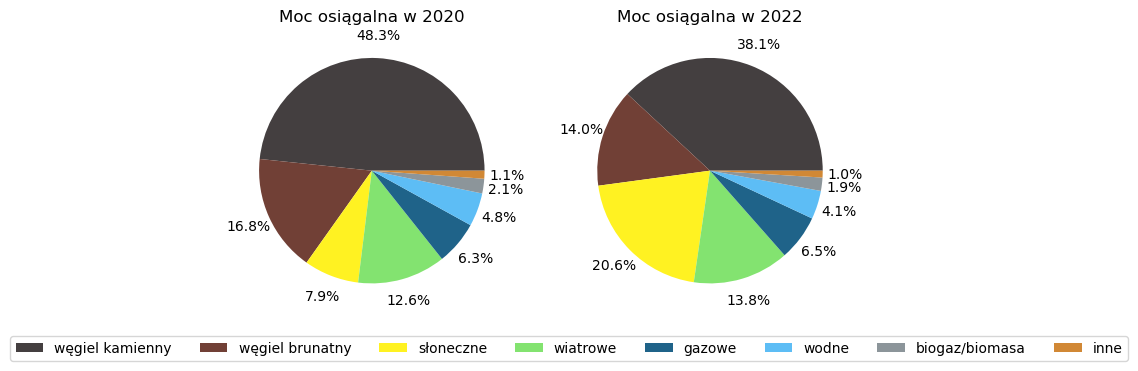

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (8,5))
#colors=sns.color_palette("RdGy",8)
#labels = df_moc['elektrownie']
colors = ["#443F40", "#714036", "#FFF222", "#83E370","#1F6389", "#5DBDF5", "#8C959A", "#D18835"]

values1 = df_moc['moc 2020']
axs[0].pie(values1, autopct='%1.1f%%', pctdistance=1.2, colors=colors)
axs[0].set_title('Moc osiągalna w 2020')


values2 = df_moc['moc 2022']
axs[1].pie(values2, autopct='%1.1f%%',pctdistance=1.2, colors=colors)
axs[1].set_title('Moc osiągalna w 2022')


plt.legend(df_moc['elektrownie'], loc="lower center", bbox_to_anchor=(0, -0.2), ncol=8)
plt.show()

Struktrę mocy osiągalnej w Polskim Systemie Elektroenergetycznym w roku 2020 i 2022 przedstawiają poniższe wykresy. 
Zauważalny jest wyraźny wzrost źródeł fotowoltaicznych, natomiast spadek źródel węglowych. Moc 

W kwietniu 2022 r. Agencja Rynku Energii poinformowała, że moc zainstalowanych żródeł fotowoltaicznych wyniosła na koniec lutego prawie 8,8 GW – dwukrotnie więcej niż w lutym 2021 r. Rosnąca moc źródeł niesterowalnych wprowadza nowe wyzwania dla utrzymania odpowiedniego zbilansowania w sieci przesyłowej. W marcu 2022 r. PSE zrealizowało pierwsze w historii ograniczenie generacji źródeł wiatrowych ze względu na nadwyżkę wytwarzania ponad zapotrzebowanie w Krajowej Sieci Elektroenergetyczne. 
Ze względów technicznych wyłączenie jednostek konwencjonalnych jest trudne lub często niemożliwe do realizacji, co sprawiło, że pomimo znacznie niższych kosztów krańcowych odłączono moce wiatrowe. Według PSE takie sytuacje będą w przyszłości pojawiać się coraz częściej, szczególnie w dni sprzyjające produkcji z OZE oraz o niskim zapotrzebowaniu na energię w systemie. 


Chociaż Polska szybko zbliża się do 60 GW mocy zainstalowanej, to pokrycie zapotrzebowania w wysokości 23 GW potrafi być problemem przy bezwietrznej pogodzie i znaczących ubytkach w elektrowniach węglowych

In [7]:
os.listdir('plan_2023')

['plan_012023.csv',
 'plan_022023.csv',
 'plan_032023.csv',
 'plan_042023.csv',
 'plan_052023.csv',
 'plan_062023.csv',
 'plan_072023.csv',
 'plan_082023.csv',
 'plan_092023.csv',
 'plan_102023.csv',
 'plan_112023.csv',
 'plan_122023.csv']

In [8]:
csv_files = [file for file in os.listdir('plan_2023') if file.endswith('.csv')]

### **Tu wpisałam ten encoding, bo inaczej wyskakiwał mi błąd - rozwiązanie z internetu **

In [9]:
# lista do połączenia tabel w jedną dla całego roku
csv_data_list = [pd.read_csv('plan_2023/'+file, sep=';', encoding='iso-8859-1') for file in csv_files]

In [10]:
plan_2023_oryginal = pd.concat(csv_data_list, axis=0, ignore_index=True)

In [11]:
plan_2023 = plan_2023_oryginal.copy()
plan_2023.head()

,Doba,Godzina,Prognozowane zapotrzebowanie sieci,Wymagana rezerwa mocy OSP,Nadwy¿ka mocy dostêpna dla OSP (7) + (9) - [(3) - (12)] - (13),Moc dyspozycyjna JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB,Moc dyspozycyjna JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB dostêpna dla OSP,Przewidywana generacja JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB (3) - (9) - (12),Prognozowana generacja JW i magazynów energii nie wiadcz¹cych us³ug bilansuj¹cych w ramach RB,Prognozowana sumaryczna generacja róde³ wiatrowych,Prognozowana sumaryczna generacja róde³ fotowoltaicznych,Planowane saldo wymiany miêdzysystemowej,Prognozowana wielkoæ niedyspozycyjnoci wynikaj¹ca z ograniczeñ sieciowych wystêpuj¹cych w sieci przesy³owej oraz sieci dystrybucyjnej w zakresie dostarczania energii elektrycznej,Przewidywana generacja zasobów wytwórczych nieobjêtych obowi¹zkami mocowymi,Obowi¹zki mocowe wszystkich jednostek rynku mocy
0,2023-01-01,1,11823,1294,2713,14578,7 342,4628,8303,5441,0,-1109,0,11175,0
1,2023-01-01,2,11031,1280,1615,14578,7 342,5727,6956,4059,0,-1652,0,9809,0
2,2023-01-01,3,11018,1286,183,15266,8 029,7846,4826,2091,0,-1654,0,8832,0
3,2023-01-01,4,10678,1259,305,14940,7 704,7399,5050,2296,0,-1771,0,8499,0
4,2023-01-01,5,10534,1230,1303,14627,7 391,6088,6000,3246,0,-1555,0,9164,0


# Przygotowanie danch

In [12]:
# Przygotowanie danych 
plan_2023=plan_2023.rename(columns={'Prognozowane zapotrzebowanie sieci':'zap',
                                  'Wymagana rezerwa mocy OSP':'rezerwa',
                                    'Nadwy¿ka mocy dostêpna dla OSP (7) + (9) - [(3) - (12)] - (13)':'nadwyżki OSP',
                                    'Moc dyspozycyjna JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB':'moc JW i mag w RB',
                                    'Moc dyspozycyjna JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB dostêpna dla OSP':'moc JW i mag w RB OSP',
                                    'Przewidywana generacja JW i magazynów energii wiadcz¹cych us³ugi bilansuj¹ce w ramach RB (3) - (9) - (12)':'gen JW i mag w RB',
                                    'Prognozowana generacja JW i magazynów energii nie wiadcz¹cych us³ug bilansuj¹cych w ramach RB':'gen JW i mag nie RB',
                                    'Prognozowana sumaryczna generacja róde³ wiatrowych':'gen wiatr',
                                    'Prognozowana sumaryczna generacja róde³ fotowoltaicznych':'gen PV',
                                    'Planowane saldo wymiany miêdzysystemowej':'wymiana',
                                    'Prognozowana wielkoæ niedyspozycyjnoci wynikaj¹ca z ograniczeñ sieciowych wystêpuj¹cych w sieci przesy³owej oraz sieci dystrybucyjnej w zakresie dostarczania energii elektrycznej':'niedyspozycje',
                                    'Przewidywana generacja zasobów wytwórczych nieobjêtych obowi¹zkami mocowymi':'gen JW nieobjętych OM',
                                    'Obowi¹zki mocowe wszystkich jednostek rynku mocy':'OM JRM',
                                 })
plan_2023.dtypes



Doba                     object
Godzina                   int64
zap                       int64
rezerwa                   int64
nadwyżki OSP              int64
moc JW i mag w RB         int64
moc JW i mag w RB OSP    object
gen JW i mag w RB         int64
gen JW i mag nie RB       int64
gen wiatr                 int64
gen PV                    int64
wymiana                   int64
niedyspozycje             int64
gen JW nieobjętych OM     int64
OM JRM                    int64
dtype: object

In [13]:
plan_2023.head()

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM
0,2023-01-01,1,11823,1294,2713,14578,7 342,4628,8303,5441,0,-1109,0,11175,0
1,2023-01-01,2,11031,1280,1615,14578,7 342,5727,6956,4059,0,-1652,0,9809,0
2,2023-01-01,3,11018,1286,183,15266,8 029,7846,4826,2091,0,-1654,0,8832,0
3,2023-01-01,4,10678,1259,305,14940,7 704,7399,5050,2296,0,-1771,0,8499,0
4,2023-01-01,5,10534,1230,1303,14627,7 391,6088,6000,3246,0,-1555,0,9164,0


In [14]:
# usunięcie jakiegoś białego znaku i połączenie w jedne ciąg
plan_2023['moc JW i mag w RB OSP']=["".join(row.split()) for row in plan_2023['moc JW i mag w RB OSP']]

# zmiania object na int 
plan_2023['moc JW i mag w RB OSP'] = plan_2023['moc JW i mag w RB OSP'].astype('int')



# zmiania formatu dat
plan_2023['Doba'] = pd.to_datetime(plan_2023['Doba']) # zmieniamy, aby potem korzystać z funkcji datowych 


# usunięcie wiersza, których 'Godz.' == 25 - jak nadac nowe indeksy w meijsce usuniętych ?
plan_2023.drop(plan_2023[plan_2023['Godzina']==25].index, inplace=True)


plan_2023.dtypes

Doba                     datetime64[ns]
Godzina                           int64
zap                               int64
rezerwa                           int64
nadwyżki OSP                      int64
moc JW i mag w RB                 int64
moc JW i mag w RB OSP             int32
gen JW i mag w RB                 int64
gen JW i mag nie RB               int64
gen wiatr                         int64
gen PV                            int64
wymiana                           int64
niedyspozycje                     int64
gen JW nieobjętych OM             int64
OM JRM                            int64
dtype: object

In [15]:
plan_2023.head()

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM
0,2023-01-01,1,11823,1294,2713,14578,7342,4628,8303,5441,0,-1109,0,11175,0
1,2023-01-01,2,11031,1280,1615,14578,7342,5727,6956,4059,0,-1652,0,9809,0
2,2023-01-01,3,11018,1286,183,15266,8029,7846,4826,2091,0,-1654,0,8832,0
3,2023-01-01,4,10678,1259,305,14940,7704,7399,5050,2296,0,-1771,0,8499,0
4,2023-01-01,5,10534,1230,1303,14627,7391,6088,6000,3246,0,-1555,0,9164,0


# Analiza danych

## Profil zapotrzebowania na rok w 2023

In [16]:
# max zapotrzebowanie każdego dnia

plan_2023.groupby('Doba', as_index=False)['zap'].max()['zap']


0      15515
1      20276
2      20822
3      21685
4      21227
       ...  
360    24001
361    24094
362    23537
363    21140
364    17508
Name: zap, Length: 365, dtype: int64

In [17]:
# średnie zapoptrzebowanie każdego dnia

srednie_godz=plan_2023.groupby('Godzina', as_index=False)['zap'].mean()
srednie_godz

,Godzina,zap
0,1,16284.238356
1,2,15996.950685
2,3,15837.112329
3,4,15832.410959
4,5,15966.317808
5,6,16330.873973
6,7,17411.194521
7,8,18465.482192
8,9,19059.720548
9,10,19230.413699


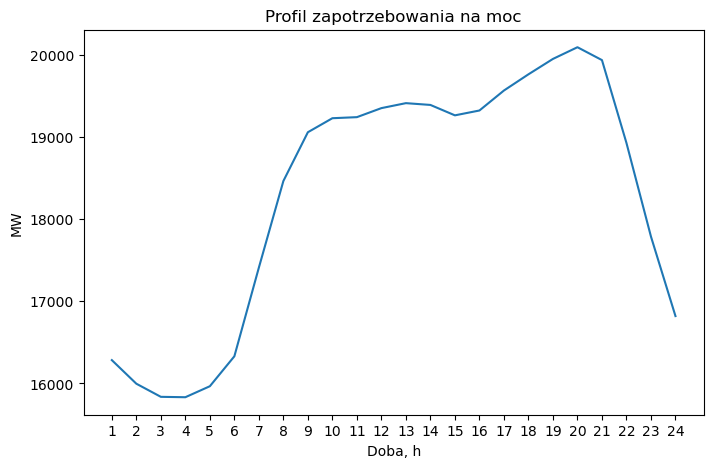

In [18]:
plt.figure(figsize = (8,5))

dayList  = srednie_godz['Godzina']
values = srednie_godz['zap']

plt.plot(dayList, values )
plt.xlabel('Doba, h')
plt.ylabel('MW')
plt.xticks(dayList)
plt.title('Profil zapotrzebowania na moc')

# tu zrobić dwa sredni letni i zmow



plt.show()

## Krajowa miesięczna produkcja i zużycie energii elektrycznej w 2023 roku.

## Bilans mocy

niedobór wymaganej nadwyżki mocy (niedobór mocy) = wymagana rezerwa - nadwyżka mocy dostępna dla OSP
wymagana rezerwa w KSE to 9% planowanego (prognozowanego przez OSP) zapotrzebowania do pokrycia przez elektrownie krajowe



In [19]:
plan_2023.head()

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM
0,2023-01-01,1,11823,1294,2713,14578,7342,4628,8303,5441,0,-1109,0,11175,0
1,2023-01-01,2,11031,1280,1615,14578,7342,5727,6956,4059,0,-1652,0,9809,0
2,2023-01-01,3,11018,1286,183,15266,8029,7846,4826,2091,0,-1654,0,8832,0
3,2023-01-01,4,10678,1259,305,14940,7704,7399,5050,2296,0,-1771,0,8499,0
4,2023-01-01,5,10534,1230,1303,14627,7391,6088,6000,3246,0,-1555,0,9164,0


In [20]:
plan_2023['Niedobór mocy'] = plan_2023['rezerwa'] - plan_2023['nadwyżki OSP']

In [21]:
plan_2023.head()

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM,Niedobór mocy
0,2023-01-01,1,11823,1294,2713,14578,7342,4628,8303,5441,0,-1109,0,11175,0,-1419
1,2023-01-01,2,11031,1280,1615,14578,7342,5727,6956,4059,0,-1652,0,9809,0,-335
2,2023-01-01,3,11018,1286,183,15266,8029,7846,4826,2091,0,-1654,0,8832,0,1103
3,2023-01-01,4,10678,1259,305,14940,7704,7399,5050,2296,0,-1771,0,8499,0,954
4,2023-01-01,5,10534,1230,1303,14627,7391,6088,6000,3246,0,-1555,0,9164,0,-73


In [22]:
(
    csv_data['orders']
    .merge(csv_data['order_details'], on='order_id')
    .merge(csv_data['pizzas'], on='pizza_id')
    .query("size == 'L'")
    .astype({'date': 'datetime64[ns]'})
    .assign(month = lambda x: x['date'].dt.strftime('%Y-%m'))
    .groupby('month', as_index=False)
    .agg(L_pizzas = ('quantity', 'sum'))
    .sort_values('L_pizzas', ascending=False)
    .head(3)
)

NameError: name 'csv_data' is not defined

In [200]:
(
    plan_2023
    .assign(miesiąc = lambda x: x['Doba'].dt.strftime('%Y-%m'))
    .groupby('miesiąc', as_index=False).mean()
    
)

C:\Users\Justyna\AppData\Local\Temp\ipykernel_5776\396975307.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plan_2023


,miesiąc,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM,Niedobór mocy
0,2023-01,12.500000,18456.177419,1851.396505,3140.010753,16533.662634,14261.341398,11101.591398,7293.685484,3301.358871,269.719086,60.895161,19.732527,10037.701613,9997.862903,-1288.614247
1,2023-02,12.500000,18783.843750,1879.001488,3810.151786,18892.251488,14685.492560,10725.828869,7810.482143,3329.833333,653.431548,247.553571,149.528274,10195.995536,10541.964286,-1931.150298
2,2023-03,12.484522,19112.306864,2959.177658,5795.683715,19959.788694,19430.738896,13456.445491,5580.029610,1372.380888,765.161507,75.830417,178.660834,4587.495289,10964.777927,-2836.506057
3,2023-04,12.500000,17942.651389,3229.677778,5217.250000,19803.158333,19803.158333,14511.531944,3431.127778,23.050000,878.079167,0.000000,74.266667,2105.454167,9044.000000,-1987.572222
4,2023-05,12.500000,16845.059140,3032.114247,6900.248656,21379.694892,21379.694892,14267.705645,2577.375000,20.188172,1028.072581,0.000000,211.768817,1767.935484,9673.548387,-3868.134409
5,2023-06,12.500000,17476.147222,3145.704167,5664.934722,21072.972222,21072.972222,15244.970833,2231.212500,14.645833,1127.258333,0.000000,163.200000,1685.558333,9996.000000,-2519.230556
6,2023-07,12.500000,17594.887097,3167.079301,5440.084677,21040.686828,21040.686828,15573.630376,2021.259409,14.185484,1174.622312,0.000000,26.935484,1592.857527,9651.108871,-2273.005376
7,2023-08,12.500000,17176.106183,3091.685484,7451.591398,22429.592742,22429.592742,14972.524194,2203.596774,13.845430,1052.049731,0.000000,5.491935,1653.888441,10110.685484,-4359.905914
8,2023-09,12.500000,17888.048611,3219.822222,5831.363889,21417.127778,21417.127778,15585.772222,2302.265278,17.773611,835.665278,0.000000,0.000000,1680.947222,9972.812500,-2611.541667
9,2023-10,12.500000,18736.060484,3372.494624,5730.001344,21472.352151,21472.352151,15742.341398,2993.725806,21.256720,529.036290,0.000000,0.000000,1881.375000,10427.822581,-2357.506720


### rezerwa

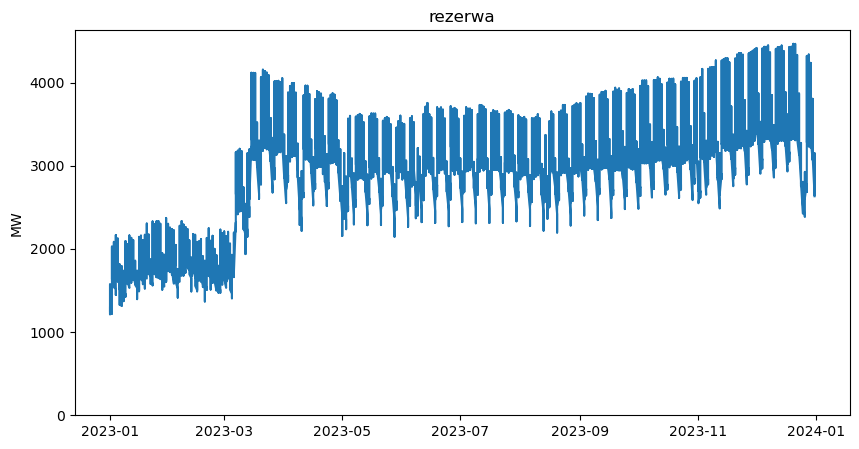

In [62]:
plt.figure(figsize = (10,5))

dayList  = plan_2023['Doba']
values_rezerwa = plan_2023['rezerwa']

plt.plot(dayList, values_rezerwa )
plt.ylabel('MW')
plt.ylim(0)
plt.title('rezerwa')


# tu zmienić, aby po prawej stronie był procent 

plt.show()

In [53]:
plan_2023['rezerwa'].max()

4466

In [54]:
plan_2023['rezerwa'].min()

1214

In [57]:
plan_2023['rezerwa %'] = plan_2023['rezerwa'] / plan_2023['zap']
plan_2023.head(1)

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM,Niedobór mocy,rezerwa %
0,2023-01-01,1,11823,1294,2713,14578,7342,4628,8303,5441,0,-1109,0,11175,0,-1419,0.109448


Na dostawie powyższego wykresu widzimy wyraźny podział na dwie głowne wielkości poziomów rezerw. Pierwszy waha się od 1200 do 2200 MW, a drugi od 2200 do 4000 MW. Skok wystepuje po 7 marca. 
Na dostawie powyższego wykresu widzimy wraźny skok przewidywanych rezerw mocy po 7 marca. 
wymagana rezerwa w KSE to 9% planowanego zapotrzebowania, więc aby ocenić z czego winika skok wykonany wykres pocentowy. 
Wykres procentowy pokazuje, że plan koorydnacyjny PSE zakłada wymóg rezerwy mocy na poziomie 18%. 
Poziom wymaganej nadwyżki mocy jest uzależniony od horyzontu planowania i dla planów opracowywanych w dobie D wynosi:
Dla doby D oraz D+1: 9% planowanego (prognozowanego przez OSP) zapotrzebowania.
Od doby D+2 do doby D+9 włącznie: 14% planowanego zapotrzebowania.
Dla pozostałych dób horyzontu planowania PBM począwszy od doby D+10: 18% planowanego zapotrzebowania.

### nadwyżki mocy

In [113]:
plan_2023['nadwyżki OSP %'] = plan_2023['nadwyżki OSP'] / plan_2023['zap']


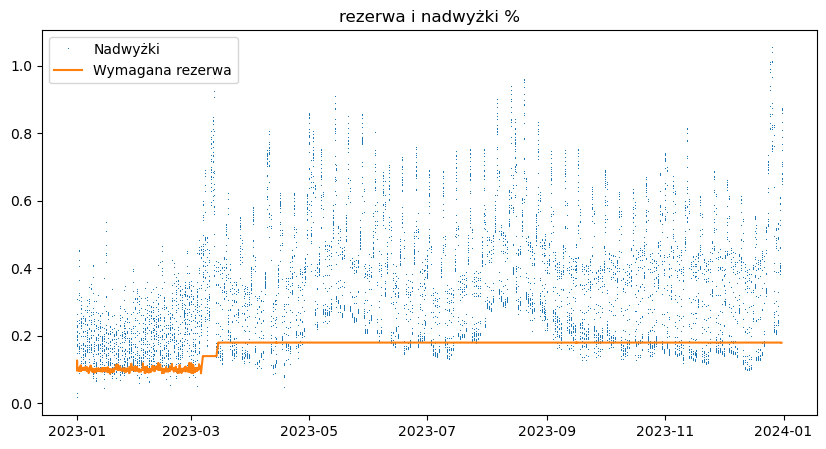

In [112]:
plt.figure(figsize = (10,5))

dayList  = plan_2023['Doba']



values_nadwyżki = plan_2023['nadwyżki OSP %']
plt.plot(dayList, values_nadwyżki, linestyle='none', marker=',', markersize=1 )

values_rezerwa = plan_2023['rezerwa %']
plt.plot(dayList, values_rezerwa )



plt.title('rezerwa i nadwyżki %')
plt.legend(['Nadwyżki', 'Wymagana rezerwa'], loc="upper left")


plt.show()

In [118]:
plan_2023.groupby('Doba', as_index=False)['zap'].max()

,Doba,zap
0,2023-01-01,15515
1,2023-01-02,20276
2,2023-01-03,20822
3,2023-01-04,21685
4,2023-01-05,21227
...,...,...
360,2023-12-27,24001
361,2023-12-28,24094
362,2023-12-29,23537
363,2023-12-30,21140


### niedobór mocy

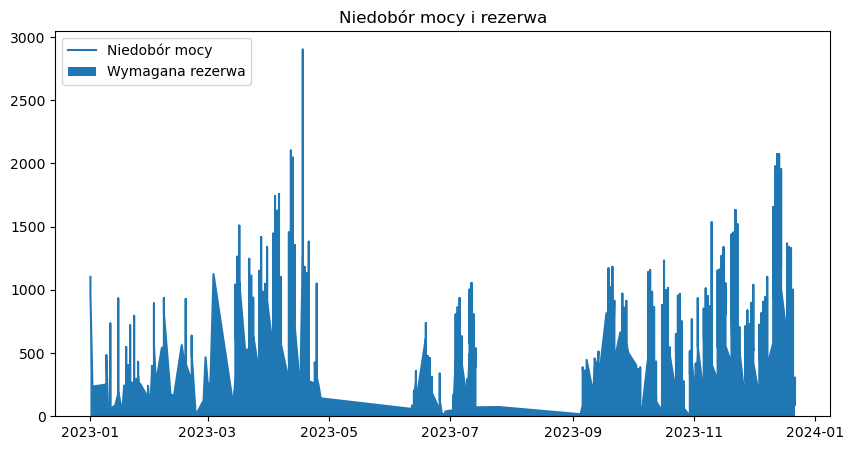

In [87]:
plt.figure(figsize = (10,5))

niedobory = plan_2023[['Doba','Niedobór mocy', 'nadwyżki OSP', 'rezerwa']][plan_2023['Niedobór mocy']>0]

dayList  = niedobory['Doba']
y_niedobór = niedobory['Niedobór mocy']
y_rezerwa = niedobory['rezerwa']
y_nadwyżki = niedobory['nadwyżki OSP']

plt.plot(dayList, y_niedobór)
#plt.plot(dayList, y_rezerwa)
#plt.plot(dayList, y_nadwyżki)
plt.ylim(0)

plt.title('Niedobór mocy i rezerwa')

plt.fill_between(dayList, y_niedobór)
plt.legend(['Niedobór mocy', 'Wymagana rezerwa'], loc="upper left")



plt.show()

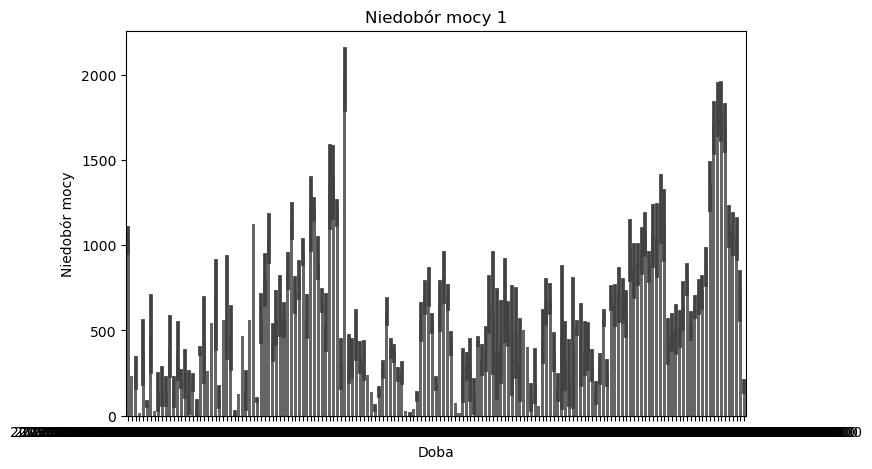

In [83]:
plt.figure(figsize = (8,5))

plt.title('Niedobór mocy 1')
niedobory = plan_2023[['Doba','Niedobór mocy', 'rezerwa']][plan_2023['Niedobór mocy']>0]
sns.barplot(data=niedobory, x='Doba', y='Niedobór mocy', color ='#666666')


plt.show()

In [88]:
plan_2023.head(1)

,Doba,Godzina,zap,rezerwa,nadwyżki OSP,moc JW i mag w RB,moc JW i mag w RB OSP,gen JW i mag w RB,gen JW i mag nie RB,gen wiatr,gen PV,wymiana,niedyspozycje,gen JW nieobjętych OM,OM JRM,Niedobór mocy,rezerwa %,nadwyżki OSP %
0,2023-01-01,1,11823,1294,2713,14578,7342,4628,8303,5441,0,-1109,0,11175,0,-1419,0.109448,0.229468


## Saldo wymiany mocy z zagranicą w dobowym szczycie krajowego zapotrzebowania na moc w poszczególnych dniach 2023 roku.

In [110]:
plan_2023.to_csv('plan_2023.csv')

In [111]:
plan_2023.max()

Doba                     2023-12-31 00:00:00
Godzina                                   24
zap                                    24809
rezerwa                                 4466
nadwyżki OSP                           15049
moc JW i mag w RB                      25207
moc JW i mag w RB OSP                  25207
gen JW i mag w RB                      20939
gen JW i mag nie RB                    12657
gen wiatr                               7841
gen PV                                  6954
wymiana                                 2942
niedyspozycje                           1962
gen JW nieobjętych OM                  19131
OM JRM                                 23614
Niedobór mocy                           2900
rezerwa %                           0.180044
nadwyżki OSP %                      1.052783
dtype: object